In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv('diabetes.csv')
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [3]:
X = df.drop('Outcome', axis = 1)
y = df['Outcome']

In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

In [6]:
features_to_scale = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

In [7]:
scaler = StandardScaler()
X_train[features_to_scale] = scaler.fit_transform(X_train[features_to_scale])
X_test[features_to_scale] = scaler.transform(X_test[features_to_scale])

In [8]:
model = LogisticRegression()

In [9]:
model.fit(X_train, y_train)

LogisticRegression()

In [10]:
y_test_pred = model.predict(X_test)

In [11]:
y_test_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
      dtype=int64)

In [12]:
print(f'Accuracy: {(accuracy_score(y_test,y_test_pred)):.4f}')

Accuracy: 0.7857


In [13]:
print(confusion_matrix(y_test,y_test_pred))

[[92  8]
 [25 29]]


In [14]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       100
           1       0.78      0.54      0.64        54

    accuracy                           0.79       154
   macro avg       0.79      0.73      0.74       154
weighted avg       0.79      0.79      0.77       154



In [15]:
cm = confusion_matrix(y_test,y_test_pred)

TN = cm [0][0]
FP = cm [0][1]
FN = cm [1][0]
TP = cm [1][1]

recall = TP / (TP+FN)

precision = TP / (TP+FP)

specificity = TN / (TN+FP)

sensitivity = TP / (TP+FN)

accuracy = (TP+TN)/(TP+FP+FN+TN)

print("Recall: ",recall)
print("Precision: ",precision)
print("Specificity: ",specificity)
print("Sensitivity: ",sensitivity)
print("Accuracy: ",accuracy)


Recall:  0.5370370370370371
Precision:  0.7837837837837838
Specificity:  0.92
Sensitivity:  0.5370370370370371
Accuracy:  0.7857142857142857


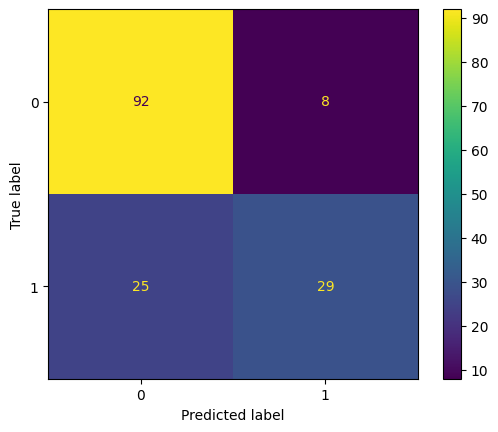

In [16]:
print(ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred))

In [17]:
comparison =pd.DataFrame({'Actual':y_test, 'Predicted': y_test_pred})
print(comparison[:15])
print(comparison[100:])

     Actual  Predicted
488       0          0
413       0          0
112       0          0
222       0          0
711       0          0
552       0          0
607       0          0
599       0          0
409       1          1
268       0          0
350       0          0
609       0          0
270       1          1
252       0          0
348       0          0
     Actual  Predicted
593       0          0
249       0          0
674       0          0
744       0          1
605       0          0
46        0          0
317       1          1
118       0          0
597       0          0
154       1          1
20        0          0
429       1          0
431       0          0
143       1          0
703       0          1
209       1          1
201       0          0
760       0          0
215       1          1
663       1          1
138       0          0
494       0          0
447       0          0
547       0          0
251       0          0
753       1          1
392       0

In [31]:
print('*** Making Predictions for new data *** ')
new_data_array = np.array([
    [9, 160, 70, 20, 80, 28, 0.5, 34],
    [0, 104, 70, 15, 0, 21, 0.1, 29],
    [2, 158, 90, 0, 0, 31.6, 1.072, 66],
    [1, 100, 66, 15, 56, 23.6, 0.666, 26],
    ])

*** Making Predictions for new data *** 


In [32]:
new_df = pd.DataFrame(data=new_data_array, columns=X_train.columns)

In [33]:
new_df = new_df.fillna(0)
print(new_df)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          9.0    160.0           70.0           20.0     80.0  28.0   
1          0.0    104.0           70.0           15.0      0.0  21.0   
2          2.0    158.0           90.0            0.0      0.0  31.6   
3          1.0    100.0           66.0           15.0     56.0  23.6   

   DiabetesPedigreeFunction   Age  
0                     0.500  34.0  
1                     0.100  29.0  
2                     1.072  66.0  
3                     0.666  26.0  


In [34]:
new_data_scaled = scaler.transform(new_df)
print(new_data_scaled)

[[ 1.51241105  1.21568845  0.02812729 -0.05598287  0.00798868 -0.53808492
   0.07422641  0.072898  ]
 [-1.13574594 -0.55168847  0.02812729 -0.37018287 -0.72822859 -1.4436368
  -1.1289155  -0.3566545 ]
 [-0.54726661  1.15256784  1.12117522 -1.31278288 -0.72822859 -0.07237252
   1.79471933  2.82203394]
 [-0.84150628 -0.67792968 -0.19048229 -0.37018287 -0.2128765  -1.10728896
   0.5735303  -0.61438599]]


In [35]:
predict_df = pd.DataFrame(data=new_data_scaled, columns=X_train.columns)
predict_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1.512411,1.215688,0.028127,-0.055983,0.007989,-0.538085,0.074226,0.072898
1,-1.135746,-0.551688,0.028127,-0.370183,-0.728229,-1.443637,-1.128915,-0.356654
2,-0.547267,1.152568,1.121175,-1.312783,-0.728229,-0.072373,1.794719,2.822034
3,-0.841506,-0.677930,-0.190482,-0.370183,-0.212877,-1.107289,0.573530,-0.614386


In [36]:
prediction = model.predict(predict_df)
prediction

array([1, 0, 1, 0], dtype=int64)

In [37]:
import joblib

joblib.dump(model, 'final_diabetes_model.pkl')
joblib.dump(list(X.columns), 'diabetes_column_names.pkl')

['diabetes_column_names.pkl']

In [38]:
loaded_model = joblib.load('final_diabetes_model.pkl')
col_names = joblib.load('diabetes_column_names.pkl')

In [39]:
new_data = np.array([
    [12, 200, 99, 18, 90, 30, 0.7, 44],
    [0, 82, 71, 16, 0, 19, 0.1, 27]
    ])

In [40]:
new_data_df = pd.DataFrame(data=new_data, columns=X_train.columns)
new_data_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,12.0,200.0,99.0,18.0,90.0,30.0,0.7,44.0
1,0.0,82.0,71.0,16.0,0.0,19.0,0.1,27.0


In [41]:
new_data_scaled = scaler.transform(new_data_df)
new_data_scaled

array([[ 2.39513005,  2.47810053,  1.61304679, -0.18166287,  0.10001584,
        -0.2793558 ,  0.67579736,  0.93200298],
       [-1.13574594, -1.24601512,  0.08277969, -0.30734287, -0.72822859,
        -1.70236591, -1.1289155 , -0.52847549]])

In [42]:
predict_df = pd.DataFrame(data = new_data_scaled, columns=X_train.columns)
predict_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2.395130,2.478101,1.613047,-0.181663,0.100016,-0.279356,0.675797,0.932003
1,-1.135746,-1.246015,0.082780,-0.307343,-0.728229,-1.702366,-1.128915,-0.528475


In [46]:
prediction = loaded_model.predict(predict_df)
prediction

array([1, 0], dtype=int64)